# Problem Statement

#### Performing PCA on  Bangalore house pricing data to reduce dimensionality 

# Data Description


1. price: This column represents the price of the house in Indian Rupees (INR). It is the target variable that you would like to predict.

2. area: The area column denotes the total area of the house in square feet. It provides information about the size or dimensions of the property.

3. bedrooms: This column represents the number of bedrooms in the house. It indicates the count of separate rooms intended for sleeping.

4. bathrooms: The bathrooms column indicates the number of bathrooms in the house. It represents the count of rooms equipped with toilet facilities.

5. stories: This column denotes the number of stories or floors in the house. It provides information about the vertical structure of the property.

6. mainroad: The mainroad column is a binary variable (0 or 1) that indicates whether the house has a main road connection or not. It represents the accessibility of the property to a major road.

7. guestroom: This binary column indicates whether the house has a guest room (0 or 1). It represents the availability of a separate room for guests.

8. basement: The basement column is a binary variable (0 or 1) that indicates whether the house has a basement or not. It represents the presence or absence of a below-ground level in the property.

9. hotwaterheating: This binary column indicates whether the house has a hot water heating system (0 or 1). It represents the availability of a system for heating water.

10. airconditioning: The airconditioning column is a binary variable (0 or 1) that indicates whether the house has an air conditioning system or not. It represents the presence or absence of cooling capabilities.

11. parking: This column represents the number of parking spaces available with the house. It indicates the count of dedicated parking areas for vehicles.

12. prefarea: The prefarea column is a binary variable (0 or 1) that indicates whether the house is located in a preferred area or not. It represents the desirability or attractiveness of the neighborhood.

13. semi-furnished: This binary column indicates whether the house is semi-furnished (0 or 1). It represents the degree of furnishing in the property, where 1 indicates partial furnishing.

14. unfurnished: The unfurnished column is a binary variable (0 or 1) that indicates whether the house is unfurnished (0) or not (1). It represents the absence or presence of furniture in the property.

15. areaperbedroom: This column represents the area per bedroom, calculated by dividing the total area of the house by the number of bedrooms. It provides information about the average area allocated per bedroom.

16. bbratio: The bbratio column denotes the ratio of the number of bathrooms to the number of bedrooms. It indicates the proportion of bathrooms to bedrooms in the house.



### Flow of the PCA process

1. Load the necessary libraries and import the dataset.
2. Separate the target variable (price) from the features.
3. Standardize the features using 'StandardScaler' to ensure they have zero mean and unit variance.
4. Perform PCA using 'PCA()' on the standardized features.
5. Calculate the explained variance ratio and cumulative explained variance.
6. Plot the scree plot to visualize the cumulative explained variance as a function of the number of principal components.
7. Determine the number of components to retain based on the desired variance threshold.
8. Perform PCA again with the selected number of components.
9. Calculate the loading scores (component loadings), which represent the contribution of each feature to each principal component.
10. Print the loading scores to see how each feature loads onto each principal component.
11. Define component names if you want to rename the components based on the features with high loadings.
12. Calculate the variance retained after performing PCA.
13. Print the explained variance ratio and the retained variance.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('newhousing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,5250000,5500,3,2,1,1,0,1,0,0,0,0,1,0,1833.333333,0.666667
1,4480000,4040,3,1,2,1,0,0,0,0,1,0,1,0,1346.666667,0.333333
2,3570000,3640,2,1,1,1,0,0,0,0,0,0,0,1,1820.000000,0.500000
3,2870000,3040,2,1,1,0,0,0,0,0,0,0,0,1,1520.000000,0.500000
4,3570000,4500,2,1,1,0,0,0,0,0,0,0,0,0,2250.000000,0.500000


In [4]:
#checking shape of the dataframe 
df.shape

(545, 16)

In [6]:
#check data types of each column
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad             int64
guestroom            int64
basement             int64
hotwaterheating      int64
airconditioning      int64
parking              int64
prefarea             int64
semi-furnished       int64
unfurnished          int64
areaperbedroom     float64
bbratio            float64
dtype: object

In [8]:
#Check for null values 
df.isna().sum()

price              0
area               0
bedrooms           0
bathrooms          0
stories            0
mainroad           0
guestroom          0
basement           0
hotwaterheating    0
airconditioning    0
parking            0
prefarea           0
semi-furnished     0
unfurnished        0
areaperbedroom     0
bbratio            0
dtype: int64

In [11]:
#Find the correlation of features 
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.063656,-0.280587,0.244809,0.231732
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.006156,-0.142278,0.805610,0.057116
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.050040,-0.126252,-0.397259,-0.317303
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.029834,-0.132107,-0.052352,0.727154
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.003648,-0.082972,-0.178942,0.032962
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.011450,-0.133123,0.249829,0.030407
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.005821,-0.099023,0.054312,0.075854
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.050284,-0.117935,-0.017034,0.047346
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.063819,-0.059194,-0.021634,0.021520
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.053179,-0.094086,0.096830,0.064649


In [15]:
#covariance matrix 
df.cov()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
price,3.498544e+12,2.175676e+09,505946.425931,486409.333378,682644.632825,193607.540576,182974.748111,167084.951632,36453.619131,394111.230505,619467.324204,261721.518922,58750.847005,-246352.584727,3.842213e+08,69130.116436
area,2.175676e+09,4.709512e+06,243.232140,211.346617,158.129368,218.558233,116.563411,49.140836,-4.193993,224.507167,659.989696,216.183301,6.592148,-144.934464,1.466974e+06,19.768824
bedrooms,5.059464e+05,2.432321e+02,0.544738,0.138674,0.261589,-0.003096,0.022760,0.034299,0.007117,0.055140,0.088562,0.024747,0.018224,-0.043740,-2.460235e+02,-0.037351
bathrooms,4.864093e+05,2.113466e+02,0.138674,0.252476,0.142171,0.007427,0.024329,0.024501,0.007066,0.043689,0.076842,0.013532,0.007397,-0.031159,-2.207247e+01,0.058274
stories,6.826446e+05,1.581294e+02,0.261589,0.142171,0.752543,0.036809,0.014460,-0.071418,0.003424,0.118480,0.034043,0.016352,-0.001562,-0.033786,-1.302530e+02,0.004561
mainroad,1.936075e+05,2.185582e+02,-0.003096,0.007427,0.036809,0.121546,0.012325,0.007326,-0.000860,0.017097,0.061407,0.029567,0.001970,-0.021786,7.308422e+01,0.001691
guestroom,1.829747e+05,1.165634e+02,0.022760,0.024329,0.014460,0.012325,0.146573,0.068025,-0.000826,0.024609,0.012358,0.026137,0.001100,-0.017795,1.744739e+01,0.004632
basement,1.670850e+05,4.914084e+01,0.034299,0.024501,-0.071418,0.007326,0.068025,0.228056,0.000438,0.010517,0.021189,0.046216,0.011849,-0.026437,-6.825698e+00,0.003606
hotwaterheating,3.645362e+04,-4.193993e+00,0.007117,0.007066,0.003424,-0.000860,-0.000826,0.000438,0.043848,-0.012665,0.012244,-0.005279,0.006594,-0.005818,-3.801284e+00,0.000719
airconditioning,3.941112e+05,2.245072e+02,0.055140,0.043689,0.118480,0.017097,0.024609,0.010517,-0.012665,0.216392,0.063795,0.023169,-0.012207,-0.020544,3.779538e+01,0.004796


Clearly column to row ratio is not sufficient , and from the above correlation and covariance matrix
we see that some of the features have have moderate to high multicollinearity . Hence we can go for PCA dimension reduction

In [16]:
# separating label and features 
target = df["price"]
features = df.drop("price", axis=1)


In [17]:
features.sample(5)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
299,3990,3,1,2,1,0,0,0,0,0,0,1,0,1330.0,0.333333
427,3570,3,1,2,1,0,1,0,0,0,0,1,0,1190.0,0.333333
137,6750,2,1,1,1,0,0,0,0,0,0,1,0,3375.0,0.500000
198,3480,3,1,1,0,0,0,0,1,0,0,0,1,1160.0,0.333333
107,8250,3,1,1,1,0,0,0,0,2,0,0,0,2750.0,0.333333


In [18]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [20]:
features_scaled 

array([[ 1.61178356e-01,  4.72783117e-02,  1.42181174e+00, ...,
        -6.96429195e-01,  1.60806222e-02,  1.38256830e+00],
       [-5.12207051e-01,  4.72783117e-02, -5.70186712e-01, ...,
        -6.96429195e-01, -5.64444358e-01, -7.09324326e-01],
       [-6.96696204e-01, -1.30886273e+00, -5.70186712e-01, ...,
         1.43589615e+00,  1.75828227e-04,  3.36621988e-01],
       ...,
       [ 1.42954128e+00,  4.72783117e-02, -5.70186712e-01, ...,
        -6.96429195e-01,  1.10953521e+00, -7.09324326e-01],
       [ 2.88700559e+00, -1.30886273e+00, -5.70186712e-01, ...,
        -6.96429195e-01,  4.63443517e+00,  3.36621988e-01],
       [-5.45415099e-01,  4.72783117e-02, -5.70186712e-01, ...,
        -6.96429195e-01, -5.93072987e-01, -7.09324326e-01]])

In [21]:
# Perform PCA
pca = PCA()
features_pca = pca.fit_transform(features_scaled)


In [22]:
features_pca

array([[ 0.6608588 , -0.17104646,  0.29030255, ..., -0.26286381,
        -0.11766196,  0.0282111 ],
       [-0.75750595, -0.45325575, -1.24020117, ..., -0.20322159,
        -0.05489197, -0.02487584],
       [-1.91995217,  1.54975914,  1.24787064, ..., -0.26100689,
        -0.06942522,  0.02871458],
       ...,
       [-0.09605631,  1.65985667, -0.49436167, ...,  1.20919746,
        -0.20895671,  0.08150163],
       [ 2.54323222,  4.34098798,  0.0854805 , ...,  1.11139593,
         0.64703597, -0.48196481],
       [-1.94832471, -0.90014852, -0.83130394, ...,  0.07617685,
        -0.10967257, -0.02205846]])

In [23]:
# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

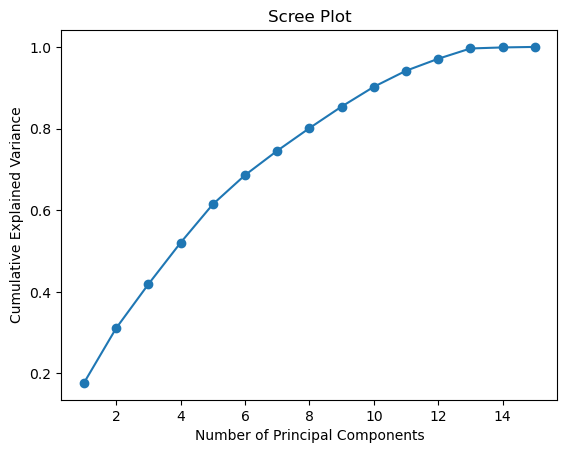

In [24]:
# Plot the scree plot
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

In [31]:
# Determine the number of components to retain based on the scree plot
# Select the number of components that retain a significant amount of variance i.e.90%

# Set the desired variance threshold (at 90%)
variance_threshold = 0.90
n_components = np.argmax(cumulative_variance >= variance_threshold) + 1


In [32]:
n_components

10

Let's say cumulative_variance is an array of cumulative explained variances [0.75, 0.88, 0.92, 0.96, 1.00]. If the variance threshold is set to 0.90, np.argmax(cumulative_variance >= variance_threshold) will return the index of the first value that satisfies the condition, which is 2. Adding 1 gives us n_components as 3, indicating that we need to retain the first three components to achieve a variance of at least 90%.

Here we are selecting 10 principal components to retain 90% variance 

In [34]:
# Perform PCA with the selected number of components
pca_final = PCA(n_components=n_components)
features_final = pca_final.fit_transform(features_scaled)

In [35]:
# Calculate the loading scores (component loadings)
loading_scores = pd.DataFrame(
    data=pca_final.components_.T,
    columns=[f"PC{i+1}" for i in range(n_components)],
    index=features.columns
)

In [41]:
# Print the loading scores
loading_scores

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
area,0.461365,0.263602,-0.053538,-0.192594,-0.156313,0.116945,0.217129,0.017371,0.318788,-0.232919
bedrooms,0.147697,-0.522121,-0.149123,-0.277967,-0.037118,0.215930,0.169495,-0.195474,0.145834,-0.263333
bathrooms,0.345185,-0.323073,0.434520,0.233873,0.032223,0.062727,0.000233,-0.196136,0.079611,-0.123645
stories,0.183631,-0.415228,0.134798,-0.246017,-0.237078,-0.118376,-0.230784,0.270740,0.117829,-0.061145
mainroad,0.277754,0.130822,-0.114579,-0.143278,-0.075234,-0.016322,-0.671396,0.080544,-0.482803,-0.247235
guestroom,0.217883,-0.056609,-0.097749,0.017893,0.526063,0.008925,0.092374,0.510368,-0.075512,-0.273781
basement,0.155258,-0.038874,-0.195460,0.128226,0.626024,0.130765,0.121678,-0.099106,-0.117101,0.032640
hotwaterheating,0.008912,-0.066714,-0.029404,0.203573,-0.131765,0.762273,-0.172689,0.405011,0.121530,0.367141
airconditioning,0.274279,-0.132665,0.075810,-0.266933,-0.002022,-0.374174,0.246783,0.323516,-0.157444,0.609494
parking,0.317438,0.040458,-0.068087,-0.061773,-0.183483,0.296653,0.276243,-0.357499,-0.575849,0.180817


#  Renaming the components based on loading scores 

- PC1: "House Size & Amenities"
- PC2: "House Layout & Features"
- PC3: "Amenities & Bath-to-Bed Ratio"
- PC4: "Floors & Furnishing"
- PC5: "Special Features & Location"
- PC6: "Basement & Furnishing"
- PC7: "Additional Features 1"
- PC8: "Additional Features 2"
- PC9: "Additional Features 3"
- PC10: "Additional Features 4"



In [37]:
# Rename the components based on the features with high loadings
component_names = {
    "PC1": "House Size & Amenities",
    "PC2": "House Layout & Features",
    "PC3": "Amenities & Bath-to-Bed Ratio",
    "PC4": "Floors & Furnishing",
    "PC5": "Special Features & Location",
    "PC6": "Basement & Furnishing",
    "PC7": "Additional Features 1",
    "PC8": "Additional Features 2",
    "PC9": "Additional Features 3",
    "PC10": "Additional Features 4"
}

In [38]:
# Explained variance after performing PCA
variance_retained = sum(explained_variance_ratio[:n_components])


In [39]:
# Print the explained variance ratio and retained variance
print("Explained Variance Ratio:")
print(explained_variance_ratio)
print("\nVariance Retained after PCA: {:.2f}%".format(variance_retained * 100))

Explained Variance Ratio:
[0.17691505 0.13408535 0.10766277 0.10167553 0.09405122 0.07149062
 0.0597086  0.05542491 0.05285237 0.04841691 0.03937155 0.02936513
 0.02520414 0.00252625 0.0012496 ]

Variance Retained after PCA: 90.23%


## Conclusion

In this PCA analysis, we applied dimensionality reduction to the dataset on housing price prediction in Bangalore. After performing PCA, we arrived at 10 principal components that explain 90.23% of the variance in the data. This means that the reduced set of 10 components retains a significant amount of information from the original dataset while reducing its dimensionality.

The 10 principal components represent different aspects of the housing data, capturing features related to house size, layout, amenities, floors, furnishing, special features, location, basement, and additional features. The component names provide a brief description of the dominant characteristics represented by each component.

By reducing the dimensionality of the dataset using PCA, we can simplify the analysis and potentially improve the performance of machine learning models that rely on these features. The retained variance of 90.23% indicates that the selected components effectively summarize the most significant information from the original dataset.

It's important to note that the choice of the number of components and the explained variance threshold may vary based on the specific requirements of the analysis or the machine learning task at hand. Further exploration and experimentation can be conducted to determine the optimal number of components and the associated variance threshold.

Overall, this PCA analysis provides a valuable reduction of the housing dataset while retaining a high amount of the original information. The 10 principal components can now be used for further analysis, feature selection, or as input for machine learning algorithms.

